In [ ]:
features_df = pd.read_excel("final_features4.0.xlsx")
features2024_df = pd.read_excel("final_features2024.xlsx")
allfeatures_df = pd.read_excel("features-9.0-with-sentiment-with-regime.xlsx")[:-2]

target_df = pd.read_excel("target.xlsx")
target2024_df = pd.read_excel("target-2024.xlsx")
alltarget_df = pd.read_excel("targetall.xlsx")

print(allfeatures_df.index)
print(alltarget_df.index)

RangeIndex(start=0, stop=292, step=1)
RangeIndex(start=0, stop=292, step=1)


In [ ]:
final_train_features = features_df.set_index('date')
final_test_features = features2024_df.set_index('date')
final_all_features = allfeatures_df.set_index('date')

train_target = target_df.set_index('date')
test_target = target2024_df.set_index('date')
final_all_target = alltarget_df.set_index('date')
#print(final_features.index)
#print(final_target.index)
#print(final_features.shape)

In [ ]:
def mean_directional_accuracy(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    if len(y_true) < 2 or len(y_pred) < 2 or len(y_true) != len(y_pred):
        return 0.0

    correct_direction_predictions = 0
    total_directional_predictions = len(y_true) - 1

    for i in range(1, len(y_true)):
        actual_change = y_true[i] - y_true[i-1]
        predicted_change = y_pred[i] - y_pred[i-1]

        if (actual_change > 0 and predicted_change > 0) or \
           (actual_change < 0 and predicted_change < 0) or \
           (actual_change == 0 and predicted_change == 0): #unlikely
            correct_direction_predictions += 1

    if total_directional_predictions == 0:
        return 0.0
    else:
        return correct_direction_predictions / total_directional_predictions

(59, 2)


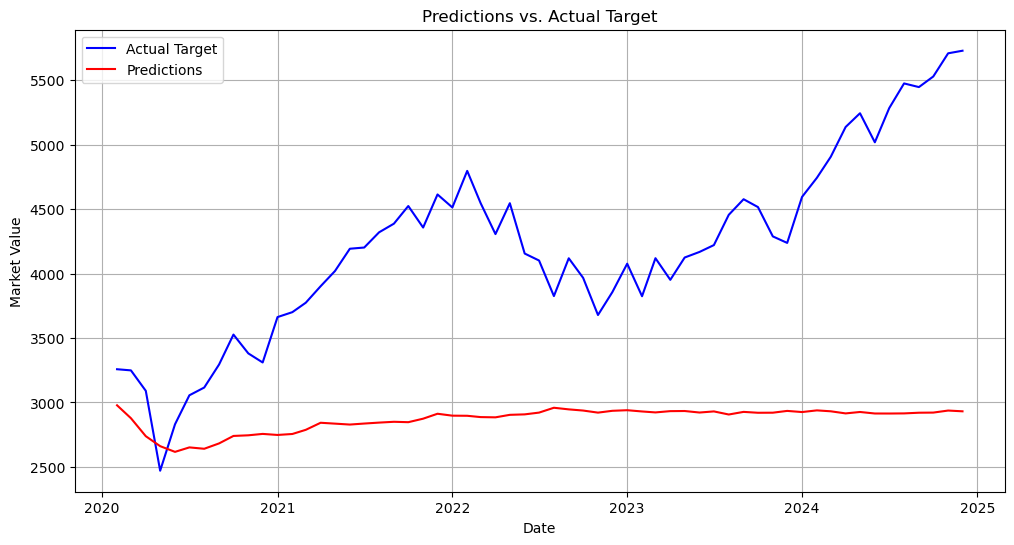

Mean Squared Error: 2222344.5115028056
Mean Directional Accuracy: 0.5517241379310345


In [ ]:
# selected_features = final_features.columns[best_chromosome == 0]
# selected_features_df = final_features[selected_features]
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Split data into train and test sets
train_size = int(len(final_all_features) * 0.8)
train_features = final_all_features[:train_size]
test_features = final_all_features[train_size:]
train_target = final_all_target[:train_size]
test_target = final_all_target[train_size:]
train_features = train_features.ffill().bfill()
test_features = test_features.ffill().bfill()

# Scaler for linear regression
scaler = StandardScaler()
#train_features = scaler.fit_transform(train_features)
#test_features = scaler.transform(test_features)

# PCA for linear regression
pca = PCA(n_components=0.90)  # Keep 98% of the variance
#train_features = pca.fit_transform(train_features)
#test_features = pca.transform(test_features)

# Train model
#model = LinearRegression(fit_intercept=True)
#model.fit(train_features, train_target)
rf_model = RandomForestRegressor(n_estimators=100, random_state=44)
rf_model.fit(train_features, train_target) 

# Predict on the same features
predictions = rf_model.predict(test_features)
print(predictions.shape)

# Convert to 1 column
predictions = predictions[:, 1]
test_target = test_target.iloc[:, 1]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_target.index, test_target, label='Actual Target', color='blue')
plt.plot(test_target.index, predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Market Value')
plt.title('Predictions vs. Actual Target')
plt.legend()
plt.grid(True)
plt.show()

# Print MSE and MDA
mse = mean_squared_error(test_target, predictions)
print(f"Mean Squared Error: {mse}")

mda = mean_directional_accuracy(test_target, predictions)
print(f"Mean Directional Accuracy: {mda}")